In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

This classification assignment will use the CIFAR 10 library which is part of Keras. https://www.cs.toronto.edu/~kriz/cifar.html CIFAR 10 is a collection of 50,000 training and 10,000 test images of 10 differnt classes of objects.  Using convolutional neural networks (convets, or CNN) to get the model accuracy above 80%

In [1]:
# Load the libraries
# Import all the necessary libraries and set the np and tf seed
#tensorflow block
import tensorflow as tf

#Keras API Block
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#Support block
import numpy as np
import pandas as pd
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR 10 library from Keras
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [3]:
# prepare the data for a CNN

X_train =  X_train.reshape((50000, 32, 32, 3))
X_train = X_train.astype('float32')/X_train.max()

X_test =  X_test.reshape((10000, 32, 32, 3))
X_test = X_test.astype('float32')/X_test.max()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

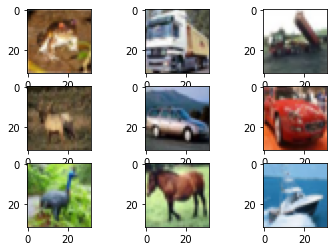

In [4]:
# View a few of the images
for i in range(0, 9):
    plt.subplot(3, 3, + 1 + i)
    plt.imshow(X_train[i].reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# Split the data into a train and validation block
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Baseline Model

A baseline model has been created for comparison of additional models. This model is sourced from the MSDS868_MNIST code.

<b>Speed</b>
The MSDS686 model takes around 19 seconds per epoch to train. It arrives on its best solution after 
<b>Accuracy</b>

Epoch 1/50
1172/1172 [==============================] - 18s 15ms/step - loss: 1.5556 - accuracy: 0.4382 - val_loss: 1.3624 - val_accuracy: 0.5158
Epoch 2/50
1172/1172 [==============================] - 18s 15ms/step - loss: 1.2010 - accuracy: 0.5707 - val_loss: 1.2786 - val_accuracy: 0.5368
Epoch 3/50
1172/1172 [==============================] - 18s 16ms/step - loss: 1.0514 - accuracy: 0.6279 - val_loss: 1.2024 - val_accuracy: 0.5634
Epoch 4/50
1172/1172 [==============================] - 20s 17ms/step - loss: 0.9554 - accuracy: 0.6661 - val_loss: 0.9300 - val_accuracy: 0.6777
Epoch 5/50
1172/1172 [==============================] - 19s 17ms/step - loss: 0.9010 - accuracy: 0.6860 - val_loss: 1.0236 - val_accuracy: 0.6422
Epoch 6/50
1172/1172 [==============================] - 19s 16ms/step - loss: 0.8500 - accuracy: 0.7016 - val_loss: 0.9610 - val_accuracy: 0.6597
Epoch 7/50
1172/1172 [==============================] - 19s 16ms/step - loss: 0.8043 - accuracy: 0.7181 - val_loss: 0.9334 -

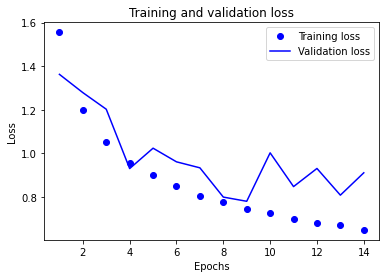

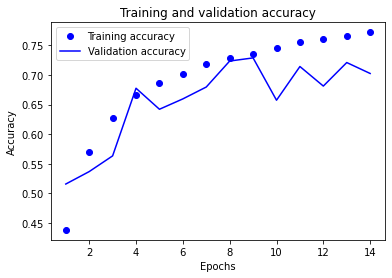

NameError: name 'test_images' is not defined

In [31]:
#Proof of concept_MSDS686_MNIST model architecure
backend.clear_session()
tf.random.set_seed(1234)
np.random.seed(1234)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

### Review literature for CNN architectures and build at least 3 different architectures with varying depths, kernels, and normalization functions.  Be sure to split your data into a validation block and monitor loss and accuracy with graphs.  Build, compile, monitor, validate, and test each CNN architecture in one cell.  Try to get one of your CNN architectures to have a test accauracy above 80%.  You may use TensorBoard if you want.
      
#### Here are some links to get you started on reviewing CNN architectures.
#### https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
#### https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b 

Epoch 1/50
1172/1172 [==============================] - 88s 75ms/step - loss: 1.7514 - accuracy: 0.3406 - val_loss: 1.3490 - val_accuracy: 0.5029
Epoch 2/50
1172/1172 [==============================] - 87s 74ms/step - loss: 1.3437 - accuracy: 0.5155 - val_loss: 1.1472 - val_accuracy: 0.5798
Epoch 3/50
1172/1172 [==============================] - 87s 74ms/step - loss: 1.1815 - accuracy: 0.5838 - val_loss: 1.0801 - val_accuracy: 0.6221
Epoch 4/50
1172/1172 [==============================] - 86s 73ms/step - loss: 1.0674 - accuracy: 0.6284 - val_loss: 0.9675 - val_accuracy: 0.6629
Epoch 5/50
1172/1172 [==============================] - 85s 73ms/step - loss: 0.9694 - accuracy: 0.6650 - val_loss: 0.9437 - val_accuracy: 0.6698
Epoch 6/50
1172/1172 [==============================] - 85s 73ms/step - loss: 0.9013 - accuracy: 0.6894 - val_loss: 0.9067 - val_accuracy: 0.6854
Epoch 7/50
1172/1172 [==============================] - 88s 75ms/step - loss: 0.8367 - accuracy: 0.7144 - val_loss: 0.9040 -

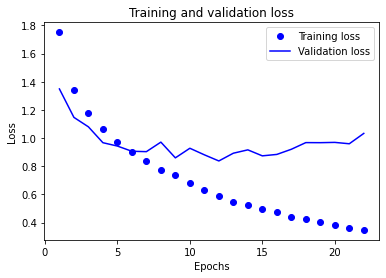

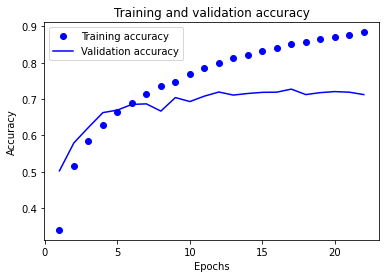

313/313 [==============================] - 4s 12ms/step - loss: 0.9294 - accuracy: 0.7238
test_acc: 0.723800003528595


In [32]:
# Small Alexnet Inspired Small Network
# more convolutional layers are added between pooling operations deep inside the model
# 3 fully connected dense layers
# dropout in the dense layers
backend.clear_session()
tf.random.set_seed(1234)
np.random.seed(1234)
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3),padding='same', activation = 'relu'))
model.add(layers.Conv2D(128, (3,3),padding='same', activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

Epoch 1/50
1172/1172 [==============================] - 34s 29ms/step - loss: 1.5943 - accuracy: 0.4183 - val_loss: 1.3070 - val_accuracy: 0.5213
Epoch 2/50
1172/1172 [==============================] - 34s 29ms/step - loss: 1.2100 - accuracy: 0.5667 - val_loss: 1.0512 - val_accuracy: 0.6281
Epoch 3/50
1172/1172 [==============================] - 35s 29ms/step - loss: 1.0420 - accuracy: 0.6291 - val_loss: 0.9294 - val_accuracy: 0.6787
Epoch 4/50
1172/1172 [==============================] - 34s 29ms/step - loss: 0.9192 - accuracy: 0.6780 - val_loss: 0.8590 - val_accuracy: 0.6973
Epoch 5/50
1172/1172 [==============================] - 32s 27ms/step - loss: 0.8232 - accuracy: 0.7131 - val_loss: 0.8098 - val_accuracy: 0.7151
Epoch 6/50
1172/1172 [==============================] - 31s 27ms/step - loss: 0.7541 - accuracy: 0.7351 - val_loss: 0.8310 - val_accuracy: 0.7119
Epoch 7/50
1172/1172 [==============================] - 30s 26ms/step - loss: 0.6850 - accuracy: 0.7569 - val_loss: 0.8225 -

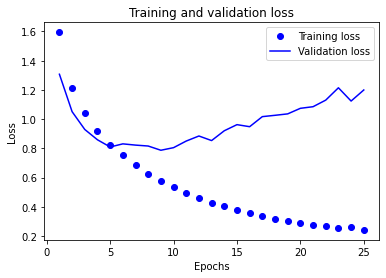

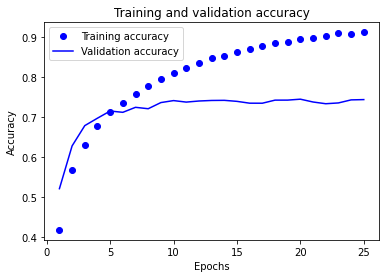

313/313 [==============================] - 2s 6ms/step - loss: 1.0795 - accuracy: 0.7422
test_acc: 0.7422000169754028


In [41]:
# VGG Inspired Small Network
# Each Convolutional layer has configuration — kernel size = 3×3, stride = 1×1, padding = same.
# The only thing that differs is number of filters.
# Each Max Pooling layer has configuration — windows size = 2×2 and stride = 2×2.
# Thus, we half the size of the image at every Pooling layer.
# maxpool stride removed due to small pixel size

backend.clear_session()
tf.random.set_seed(1234)
np.random.seed(1234)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', strides = (1,1), padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu', strides = (1,1), padding = 'same' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu', strides = (1,1), padding = 'same' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

Epoch 1/50
75/75 [==============================] - 96s 1s/step - loss: 2.0520 - accuracy: 0.2202 - val_loss: 1.7276 - val_accuracy: 0.3521
Epoch 2/50
75/75 [==============================] - 94s 1s/step - loss: 1.6041 - accuracy: 0.4070 - val_loss: 1.4208 - val_accuracy: 0.4726
Epoch 3/50
75/75 [==============================] - 96s 1s/step - loss: 1.3936 - accuracy: 0.4915 - val_loss: 1.2302 - val_accuracy: 0.5550
Epoch 4/50
75/75 [==============================] - 94s 1s/step - loss: 1.2669 - accuracy: 0.5441 - val_loss: 1.1434 - val_accuracy: 0.5873
Epoch 5/50
75/75 [==============================] - 94s 1s/step - loss: 1.1486 - accuracy: 0.5911 - val_loss: 1.0814 - val_accuracy: 0.6166
Epoch 6/50
75/75 [==============================] - 94s 1s/step - loss: 1.0704 - accuracy: 0.6194 - val_loss: 0.9628 - val_accuracy: 0.6586
Epoch 7/50
75/75 [==============================] - 94s 1s/step - loss: 0.9957 - accuracy: 0.6477 - val_loss: 0.9367 - val_accuracy: 0.6732
Epoch 8/50
75/75 [==

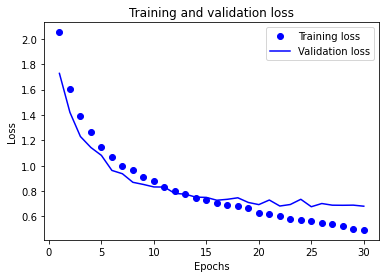

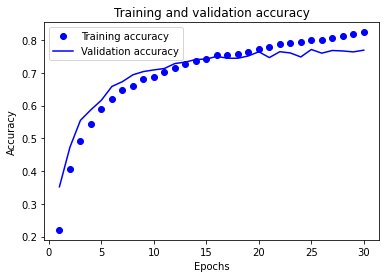

313/313 [==============================] - 5s 14ms/step - loss: 0.6953 - accuracy: 0.7626
test_acc: 0.7626000046730042


In [24]:

# https://devashree-madhugiri.medium.com/using-cnn-for-image-classification-on-cifar-10-dataset-7803d9f3b983
backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(64, (4,4), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (4,4), activation = 'relu' ))
model.add(layers.Conv2D(128, (4,4), activation = 'relu' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 500,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

In [9]:

# https://devashree-madhugiri.medium.com/using-cnn-for-image-classification-on-cifar-10-dataset-7803d9f3b983
backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(64, (4,4), activation = 'relu',padding='same' ,input_shape = (32, 32, 3)))
model.add(layers.Conv2D(64, (4,4), activation = 'relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (4,4), activation = 'relu',padding='same' ))
model.add(layers.Conv2D(128, (4,4), activation = 'relu',padding='same' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3,3), activation = 'relu',padding='same' ))
model.add(layers.Conv2D(256, (3,3), activation = 'relu',padding='same' ))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

history = model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 500,  
          validation_data=(X_val, y_val),
          verbose = 1,
          callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights = True)])

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_acc:', test_acc)

Epoch 1/50
73/75 [============================>.] - ETA: 6s - loss: 2.2207 - accuracy: 0.1506

KeyboardInterrupt: 

In [30]:
backend.clear_session()